In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # For ANOVA/Kruskal-Wallis
import os

# --- Configuration ---
countries = ['benin-malanville', 'sierraleone-bumbuna', 'togo-dapaong']
cleaned_data_dir = '../data/'

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

In [3]:
# --- 1. Load each country’s cleaned CSV ---
all_countries_df = pd.DataFrame()

print("--- Loading Cleaned Data ---")
for country in countries:
    file_path = os.path.join(cleaned_data_dir, f"{country}_clean.csv")
    try:
        # Load with Timestamp as index directly
        df_country = pd.read_csv(file_path, index_col='Timestamp', parse_dates=True)
        df_country['Country'] = country.capitalize() # Add a country column
        all_countries_df = pd.concat([all_countries_df, df_country])
        print(f"Loaded {country}_clean.csv. Shape: {df_country.shape}")
    except FileNotFoundError:
        print(f"Error: {file_path} not found. Please ensure the cleaning script was run for {country}.")
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

if all_countries_df.empty:
    print("\nNo data loaded. Please ensure cleaned CSVs exist in the '../data/' directory.")
    exit() # Exit if no data was loaded

print(f"\nCombined DataFrame shape: {all_countries_df.shape}")
print("Combined DataFrame head:\n", all_countries_df.head())
print("\nCombined DataFrame info:")
all_countries_df.info()

--- Loading Cleaned Data ---
Loaded benin-malanville_clean.csv. Shape: (525600, 23)
Loaded sierraleone-bumbuna_clean.csv. Shape: (525600, 23)
Loaded togo-dapaong_clean.csv. Shape: (525600, 24)

Combined DataFrame shape: (1576800, 24)
Combined DataFrame head:
                      GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
Timestamp                                                                 
2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

                     WSstdev  ...  Precipitation  TModA  TModB  ModA_original  \
Timestamp                     ...                                               
2021-08-09 00:01:00      0.1  ...            0.0   2


--- Metric Comparison: Boxplots ---


/tmp/ipykernel_64132/3887884527.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=all_countries_df, palette='viridis')


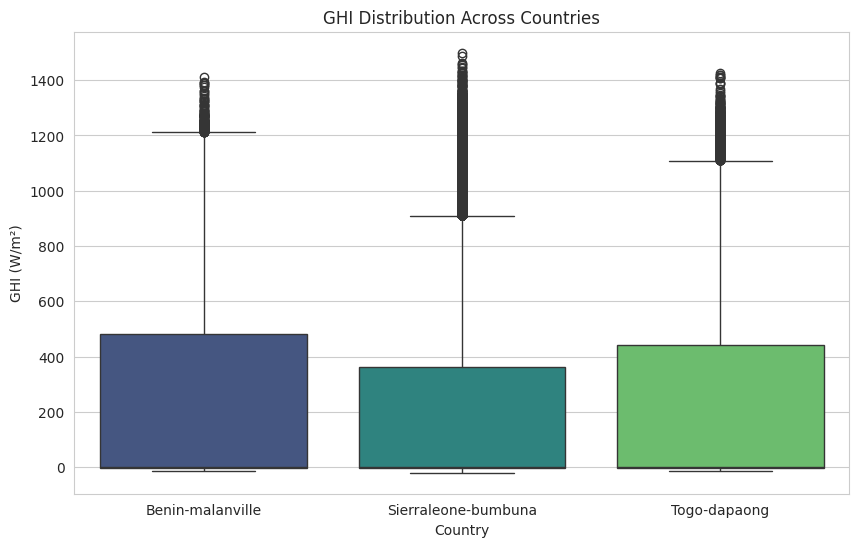

/tmp/ipykernel_64132/3887884527.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=all_countries_df, palette='viridis')


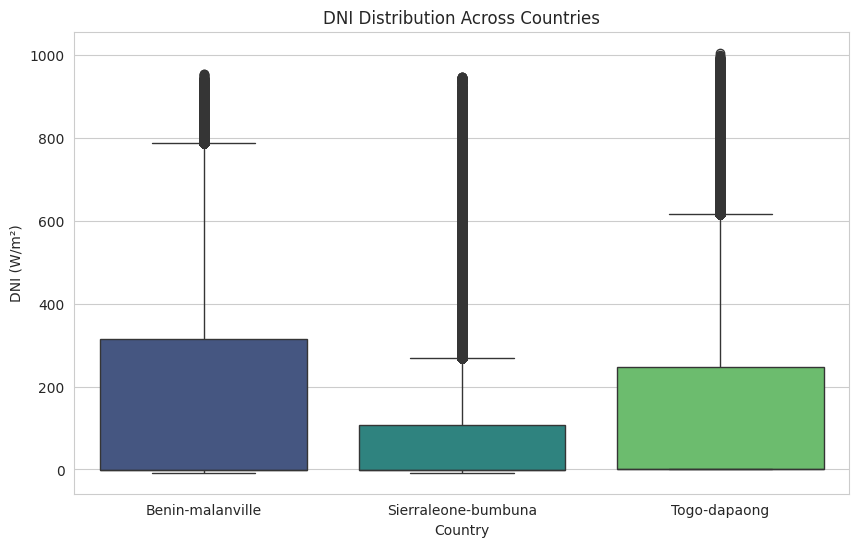

/tmp/ipykernel_64132/3887884527.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=all_countries_df, palette='viridis')


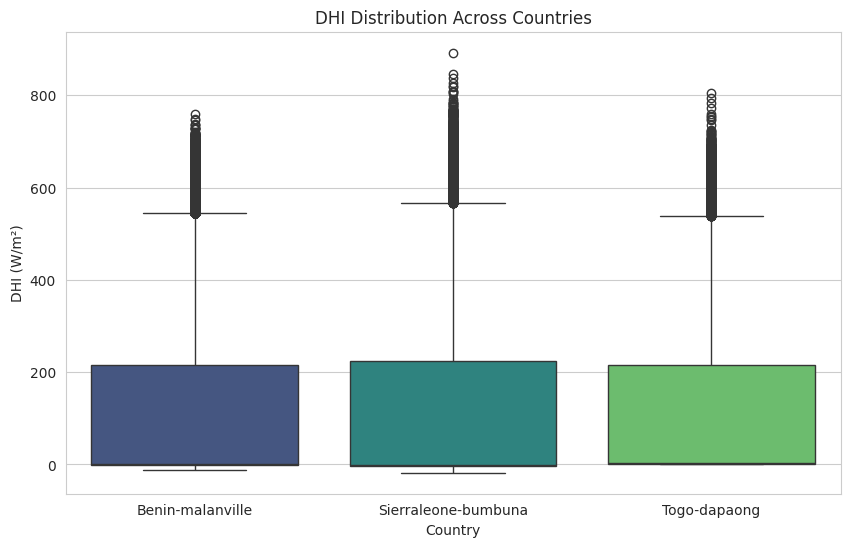


--- Metric Comparison: Summary Table ---
                            GHI                            DNI         \
                           mean median         std        mean median   
Country                                                                 
Benin-malanville     240.559452    1.8  331.131327  167.187516   -0.1   
Sierraleone-bumbuna  201.957515    0.3  298.495150  116.376337   -0.1   
Togo-dapaong         230.555040    2.1  322.532347  151.258469    0.0   

                                        DHI                     
                            std        mean median         std  
Country                                                         
Benin-malanville     261.710501  115.358961    1.6  158.691074  
Sierraleone-bumbuna  218.652659  113.720571   -0.1  158.946032  
Togo-dapaong         250.956962  116.444352    2.5  156.520714  

Formatted Summary Table:


In [4]:
# --- 2. Metric Comparison ---
print("\n--- Metric Comparison: Boxplots ---")

# Boxplots of GHI, DNI, DHI side-by-side
metrics_to_compare = ['GHI', 'DNI', 'DHI']

for metric in metrics_to_compare:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Country', y=metric, data=all_countries_df, palette='viridis')
    plt.title(f'{metric} Distribution Across Countries')
    plt.ylabel(f'{metric} (W/m²)')
    plt.xlabel('Country')
    plt.show()

print("\n--- Metric Comparison: Summary Table ---")

# Summary Table comparing mean, median, and standard deviation
summary_table = all_countries_df.groupby('Country')[metrics_to_compare].agg(['mean', 'median', 'std'])
print(summary_table)

# Optional: Format for better readability
summary_table_formatted = summary_table.style.format({
    ('GHI', 'mean'): "{:.2f}", ('GHI', 'median'): "{:.2f}", ('GHI', 'std'): "{:.2f}",
    ('DNI', 'mean'): "{:.2f}", ('DNI', 'median'): "{:.2f}", ('DNI', 'std'): "{:.2f}",
    ('DHI', 'mean'): "{:.2f}", ('DHI', 'median'): "{:.2f}", ('DHI', 'std'): "{:.2f}"
})
print("\nFormatted Summary Table:")
display(summary_table_formatted) # Use display() for pretty printing in Jupyter/IPython


In [5]:
# --- 3. Statistical Testing (Optional but Recommended) ---
print("\n--- Statistical Testing: One-way ANOVA on GHI ---")

# Prepare data for ANOVA
ghi_by_country = [all_countries_df['GHI'][all_countries_df['Country'] == country.capitalize()].dropna() for country in countries]

# Check if there's enough data for ANOVA
if all(len(g) > 1 for g in ghi_by_country) and len(ghi_by_country) > 1:
    f_statistic, p_value = stats.f_oneway(*ghi_by_country)
    print(f"One-way ANOVA F-statistic for GHI: {f_statistic:.2f}")
    print(f"One-way ANOVA p-value for GHI: {p_value:.4f}")

    if p_value < 0.05:
        print("\nInterpretation: The p-value is less than 0.05, indicating a statistically significant difference in mean GHI values across the countries.")
    else:
        print("\nInterpretation: The p-value is greater than 0.05, indicating no statistically significant difference in mean GHI values across the countries.")
else:
    print("Not enough data to perform ANOVA. Ensure at least two countries have more than one GHI data point.")




--- Statistical Testing: One-way ANOVA on GHI ---
One-way ANOVA F-statistic for GHI: 2090.09
One-way ANOVA p-value for GHI: 0.0000

Interpretation: The p-value is less than 0.05, indicating a statistically significant difference in mean GHI values across the countries.


# 4. Key Observations

- **Overall Solar Potential Ranking**: Benin-malanville exhibits the highest average GHI and DNI, indicating it generally receives the most overall and direct solar radiation, making it potentially the most promising site for solar energy generation among the three.
- **Dominant Irradiance Component**: While all sites show low median irradiance due to day-night cycles, Benin-malanville and Togo-dapaong have notably higher average DNI, suggesting more prevalence of direct sunlight, whereas Togo-dapaong's slightly higher average DHI could imply more atmospheric scattering or cloud presence impacting diffuse radiation.
- **High Variability Across All Sites**: All three locations demonstrate significant variability in solar irradiance metrics (high standard deviations for GHI, DNI, DHI), which is characteristic of solar data due to the inherent day-night cycle and fluctuating weather conditions. Benin-malanville shows the highest variability, suggesting a wider range between its peak and lowest irradiance periods.


--- Visual Summary: Ranking by Average GHI ---


/tmp/ipykernel_64132/699100536.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi_by_country.index, y=avg_ghi_by_country.values, palette='coolwarm')


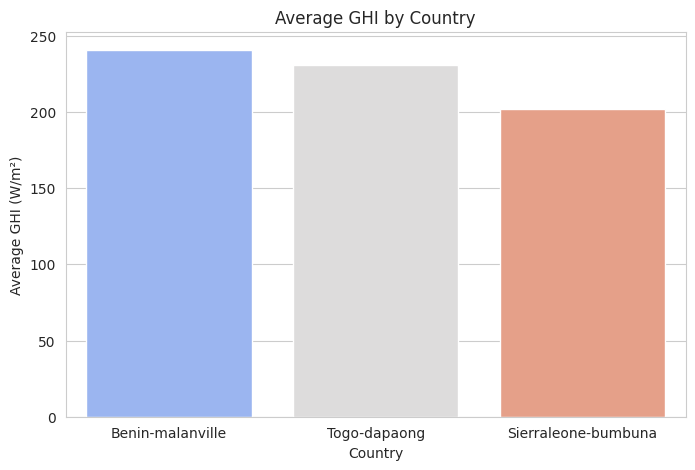


--- Comparison EDA Complete ---


In [7]:
# --- 5. Visual Summary (Bonus) ---
print("\n--- Visual Summary: Ranking by Average GHI ---")

avg_ghi_by_country = all_countries_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_ghi_by_country.index, y=avg_ghi_by_country.values, palette='coolwarm')
plt.title('Average GHI by Country')
plt.ylabel('Average GHI (W/m²)')
plt.xlabel('Country')
plt.ylim(0) # Ensure y-axis starts from 0
plt.show()

print("\n--- Comparison EDA Complete ---")